In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# cd drive/'My Drive'/'Drive Files'/'Colab Notebooks'/'FYP'

/content/drive/My Drive/Drive Files/Colab Notebooks/FYP


In [4]:
df = pd.read_csv('Raabta_dataset - donations.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
Unnamed: 0    372 non-null int64
Label         372 non-null object
body          372 non-null object
dtypes: int64(1), object(2)
memory usage: 8.8+ KB


In [0]:
df.head()
df = df[['Label', 'body']]

In [6]:
df.Label.value_counts()

misc          149
basicneeds     75
bills          46
medical        45
education      28
pets           20
loan            9
Name: Label, dtype: int64

In [7]:
df['Label'].unique()

array(['basicneeds', 'loan', 'medical', 'misc', 'bills', 'education',
       'pets'], dtype=object)

In [8]:
# !pip install cufflinks
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [9]:
df['Label'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of Complaints', 
                                                                title='Number complaints in each product')

In [10]:
def print_plot(index):
    example = df[df.index == index][['body', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
print_plot(10)

Hey everyone! Through Penn State, we are raising money to help fight pediatric cancer. All proceeds are going towards the Four Diamonds Foundation, which helps provide families with emotional and financial support so they can focus on raising their children without ever seeing a medical bill. Our efforts culminate into a 46 hour no sitting, no sleeping dance marathon held in February! Dancing is an extreme honor, as they are the people who are not allowed to sleep or sit for this allotted amount of time. In order to dance, you need to raise a certain amount of money ($2700) in order to get a ticket into the lottery. Time is running out, which is why I am asking for your help! Any penny helps, so hopefully one day we can dance in celebration (but for now, we dance for a cure!)

&#x200B;

Here is the link to donate :)

[https://donate.thon.org/index.cfm?fuseaction=donorDrive.participant&participantID=33185](https://donate.thon.org/index.cfm?fuseaction=donorDrive.participant&participantID

In [11]:
print_plot(100)

It all started with her UTI weeks ago. I manged to get it under control. But it's spread to her bladder. I need to raise about £201. If anyone can give anything at all, i would be extremely grateful! I'm even willing to pay you back. I work hard but the vets bills are getting impossible. They're saying she may have to be put down!

There's no services where i live that help people on low earning incomes with these things. 

So I'm reaching out on reddit. If u can offer anything (even £1), it will help me get that goal.

My PayPal is j3nkinsc@aol.com. feel free to message me too. If anyone out there is kind enough to donate, message me and let me know so I can thank you personally!

Hoping someone's out there sees this and can help.
Label: medical


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['body'] = df['body'].apply(clean_text)
df['body'] = df['body'].str.replace('\d+', '')

In [14]:
print_plot(10)

hey everyone penn state raising money help fight pediatric cancer proceeds going towards four diamonds foundation helps provide families emotional financial support focus raising children without ever seeing medical bill efforts culminate  hour sitting sleeping dance marathon held february dancing etreme honor people allowed sleep sit allotted amount time order dance need raise certain amount money  order get ticket lottery time running asking help penny helps hopefully one day dance celebration dance cure #b link donate https donatethonorg indecfmfuseactiondonordriveparticipantparticipantid https donatethonorg indecfmfuseactiondonordriveparticipantparticipantid
Label: medical


In [15]:
print_plot(100)

started uti weeks ago manged get control spread bladder need raise  anyone give anything would etremely grateful im even willing pay back work hard vets bills getting impossible theyre saying may put downtheres services live help people low earning incomes things im reaching reddit u offer anything even  help get goalmy paypal jnkinsc aolcom feel free message anyone kind enough donate message let know thank personallyhoping someones sees help
Label: medical


In [16]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['body'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 5275 unique tokens.


In [17]:
X = tokenizer.texts_to_sequences(df['body'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (372, 250)


In [18]:
Y = pd.get_dummies(df['Label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (372, 7)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(334, 250) (334, 7)
(38, 250) (38, 7)


In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(500, dropout=0.1, recurrent_dropout=0.1)))

# model.add(tf.keras.layers.LSTM(50)) #, dropout=0.2, recurrent_dropout=0.2
model.add(tf.keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

epochs = 18
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, validation_split= 0.10, batch_size=batch_size) 
#validation_split=0.10, batch_size=batch_size

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 300 samples, validate on 34 samples
Epoch 1/18
300/300 [==============================] - 6s 19ms/sample - loss: 1.9139 - acc: 0.2633 - val_loss: 1.5961 - val_acc: 0.4706
Epoch 2/18
300/300 [==============================] - 3s 9ms/sample - loss: 2.2930 - acc: 0.4000 - val_loss: 1.6463 - val_acc: 0.4706
Epoch 3/18
300/300 [===================

##### Test Accuracy

In [21]:
accr = model.evaluate (X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

38/38 [==============================] - 0s 8ms/sample - loss: 1.6226 - acc: 0.3947
Test set
  Loss: 1.623
  Accuracy: 0.395


##### Train Accuracy

In [22]:
accr = model.evaluate (X_train, Y_train)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

334/334 [==============================] - 2s 5ms/sample - loss: 0.8730 - acc: 0.6766
Test set
  Loss: 0.873
  Accuracy: 0.677


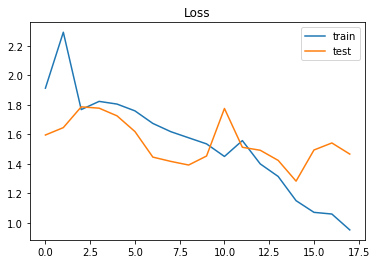

In [23]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

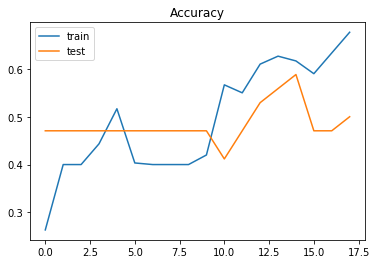

In [24]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [25]:
new_request = ['I havent taken any classes since forever, and my university is lagging because of that']
seq = tokenizer.texts_to_sequences(new_request)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['basicneeds', 'loan', 'medical', 'misc', 'bills', 'education',
       'pets']
print(pred, labels[np.argmax(pred)])

[[0.03911096 0.04845498 0.13471214 0.03967619 0.13248008 0.51805013
  0.08751554]] education


In [0]:
model.save_weights('./checkpoints/my_checkpoint')

In [0]:
model.load_weights('./checkpoints/my_checkpoint')